In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file = Path('crypto_data.csv')

In [3]:
df = pd.read_csv(file, index_col=0)
df.head()

CoinName Algorithm  IsTrading ProofType  TotalCoinsMined TotalCoinSupply
42     42 Coin    Scrypt       True   PoW/PoS     4.199995e+01              42
365    365Coin       X11       True   PoW/PoS              NaN      2300000000
404    404Coin    Scrypt       True   PoW/PoS     1.055185e+09       532000000
611  SixEleven   SHA-256       True       PoW              NaN          611000
808        808   SHA-256       True   PoW/PoS     0.000000e+00               0

In [4]:
algorithms = set(df.Algorithm.values)
print(algorithms)

{'X11GOST', 'TRC10', 'Lyra2RE', 'VBFT', 'POS 3.0', 'Scrypt-n', 'CryptoNight Heavy', 'QuarkTX', 'SHA3-256', 'POS 2.0', 'X15', 'ScryptOG', 'T-Inside', 'Stanford Folding', 'IMesh', 'YescryptR16', 'Groestl', 'PHI2', 'Time Travel', 'SkunkHash v2 Raptor', 'Green Protocol', '1GB AES Pattern Search', 'SHA3', 'Ethash', 'M00N', 'Argon2d', 'Progressive-n', 'Multiple', 'Blake2b', 'SHA-256', 'Jump Consistent Hash', 'XG Hash', 'SHA-512', 'VeChainThor Authority', 'X11', 'Rainforest', 'X16R', 'NIST5', 'Blake', 'Semux BFT consensus', 'Ouroboros', 'Skein', 'vDPOS', 'Equihash1927', 'Scrypt', 'Tribus', 'SHA-256 + Hive', 'Counterparty', 'SHA-256D', 'Momentum', 'Equihash+Scrypt', 'PHI1612', 'Proof-of-Authority', 'Dagger-Hashimoto', 'Zhash', 'CryptoNight Heavy X', 'Cryptonight-GPU', 'X13', 'PoS', 'Blake2S', 'Slatechain', 'BLAKE256', 'DPoS', 'M7 POW', 'Lyra2REv2', 'Avesta hash', 'HMQ1725', 'QuBit', 'Leased POS', 'XEVAN', 'CryptoNight-V7', 'Exosis', 'CryptoNight', 'Equihash', 'NeoScrypt', 'Lyra2Z', 'Argon2', '

In [5]:
df["IsTrading"].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
df = df.loc[df["IsTrading"]==True]
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [7]:
df = df.drop("IsTrading", axis=1)
df.head()

CoinName Algorithm ProofType  TotalCoinsMined TotalCoinSupply
42     42 Coin    Scrypt   PoW/PoS     4.199995e+01              42
365    365Coin       X11   PoW/PoS              NaN      2300000000
404    404Coin    Scrypt   PoW/PoS     1.055185e+09       532000000
611  SixEleven   SHA-256       PoW              NaN          611000
808        808   SHA-256   PoW/PoS     0.000000e+00               0

In [8]:
df = df.dropna(axis=0, how='any')
df.shape

(685, 5)

In [9]:
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [10]:
df = df[df["TotalCoinsMined"]>0]
len(df)

532

In [11]:
df = df.drop("CoinName", axis=1)
df.head()

Algorithm ProofType  TotalCoinsMined TotalCoinSupply
42      Scrypt   PoW/PoS     4.199995e+01              42
404     Scrypt   PoW/PoS     1.055185e+09       532000000
1337       X13   PoW/PoS     2.927942e+10    314159265359
BTC    SHA-256       PoW     1.792718e+07        21000000
ETH     Ethash       PoW     1.076842e+08               0

In [12]:
x = pd.get_dummies(data=df, columns=["Algorithm", "ProofType"])
print(x.shape)
x.head()

(532, 98)


TotalCoinsMined TotalCoinSupply  Algorithm_1GB AES Pattern Search  \
42       4.199995e+01              42                                 0   
404      1.055185e+09       532000000                                 0   
1337     2.927942e+10    314159265359                                 0   
BTC      1.792718e+07        21000000                                 0   
ETH      1.076842e+08               0                                 0   

      Algorithm_536  Algorithm_Argon2d  Algorithm_BLAKE256  Algorithm_Blake  \
42                0                  0                   0                0   
404               0                  0                   0                0   
1337              0                  0                   0                0   
BTC               0                  0                   0                0   
ETH               0                  0                   0                0   

      Algorithm_Blake2S  Algorithm_Blake2b  Algorithm_C11  ...  \
42                    0                  0              0  ...   
404                   0                  0              0  ...   
1337                  0                  0              0  ...   
BTC                   0                  0              0  ...   
ETH                   0                  0              0  ...   

      ProofType_PoW/PoS  ProofType_PoW/PoS   ProofType_PoW/PoW  \
42                    1                   0                  0   
404                   1                   0                  0   
1337                  1                   0                  0   
BTC                   0                   0                  0   
ETH                   0                   0                  0   

      ProofType_PoW/nPoS  ProofType_Pos  ProofType_Proof of Authority  \
42                     0              0                             0   
404                    0              0                             0   
1337                   0              0                             0   
BTC                    0              0                             0   
ETH                    0              0                             0   

      ProofType_Proof of Trust  ProofType_TPoS  \
42                           0               0   
404                          0               0   
1337                         0               0   
BTC                          0               0   
ETH                          0               0   

      ProofType_Zero-Knowledge Proof  ProofType_dPoW/PoW  
42                                 0                   0  
404                                0                   0  
1337                               0                   0  
BTC                                0                   0  
ETH                                0                   0  

[5 rows x 98 columns]

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
x_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [16]:
x_scaled.shape

(532, 98)

In [24]:
pca = PCA(n_components=0.99)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 86)

In [25]:
pca.explained_variance_.sum()

97.35133315075764

In [26]:
pca = PCA(n_components=0.90)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 74)

In [27]:
pca.explained_variance_.sum()

88.47283457566152

In [30]:
tsnei = TSNE(perplexity=50)
tsneiFeatures = tsnei.fit_transform(prin_components)
tsneiFeatures.shape

C:\Users\danie\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\danie\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

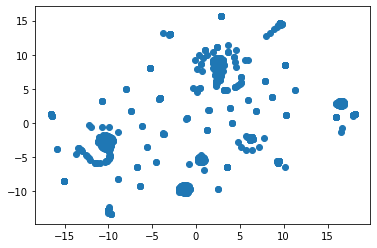

In [31]:
x = tsneiFeatures[:,0]
y = tsneiFeatures[:,1]

plt.scatter(x, y)
plt.show()

In [35]:
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kmeans = KMeans(n_clusters = value, random_state=0)
    kmeans.fit(prin_components)
    inertia.append(kmeans.inertia_)

C:\Users\danie\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


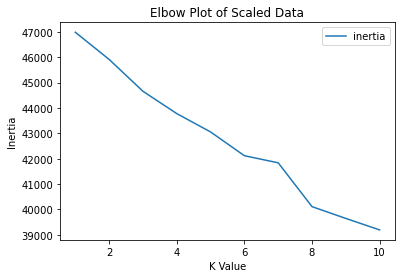

In [39]:
elbowPlot = pd.DataFrame({'K': k, "inertia": inertia})
elbowPlot.plot.line(x='K', y='inertia')
plt.ylabel("Inertia")
plt.xlabel("K Value")
plt.title("Elbow Plot of Scaled Data")
plt.show()

## Conclusion
#### The TSNE and elbow plot concludes that we dont have a meaninful cluster is happening at all in this respective dataset.